In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

In [8]:
def normalizae():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    df = pd.read_csv(url, header=None)
    target = df[0]

    # Convertendo o dataframe e um NumpyArray
    df = df.drop(columns=[0])
    data = df.values

    # Normalizando o array
    scaler = MinMaxScaler()
    X = scaler.fit_transform(data)
    # X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Transformando 13 variáveis númericas em 3
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    
    # Retornando o DataFrame que sera usado no kmeans e os labels corretos (para comparar depois)
    return pd.DataFrame(X_pca)

In [9]:
# Usando o método Elbow para achar o número ideal de clusteres
def elbow_method(data, min, max):
  kmeans = KMeans(n_init=10)
  vis = KElbowVisualizer(kmeans, k=(min,max))
  vis.fit(data)
  vis.poof()

In [10]:
# Usando o silhoutte para confirmar que o 
def silhouette(dataset, min, max):
  for i in range(min, max):
    kmean = KMeans(n_clusters=i, n_init=10)
    kmean.fit(dataset)
    label = kmean.predict(dataset)
    print(f'Silhouette Score(n={i}): {silhouette_score(dataset, label)}')

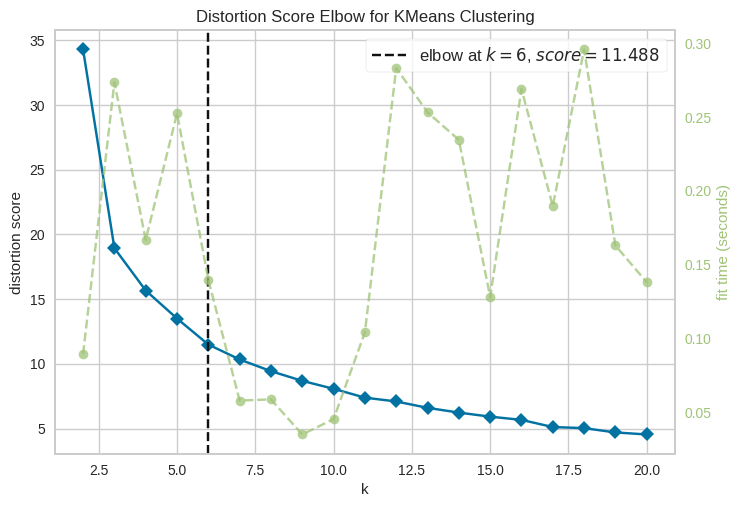

In [11]:
min = 2
max = 21
dataset = normalizae()
elbow_method(dataset, min, max)

Pelo gráfico Elbow acima, podemos notar que não há um ponto claro que possamos escolher como a quantidade ideal de clusteres, apesar do gráfico dizer que k=6 é o melhor ponto, então, em vez de simplesmente pegar 6 como o número ideal, iremos calcular o Silhouette Score para kmeans com 3, 4, 5, 6 e 7 cluesteres, de forma que o kmean com o maior Silhouette Score será o kmean com a quantidade ideal de clusteres.





In [12]:
n = [3, 4, 5, 6, 7]

for i in n:
    kmean = KMeans(n_clusters=i, n_init=10)
    kmean.fit(dataset)
    label = kmean.predict(dataset)
    print(f'Silhouette Score(n={i}): {silhouette_score(dataset, label)}')

Silhouette Score(n=3): 0.47796626568347655
Silhouette Score(n=4): 0.4347348309376317
Silhouette Score(n=5): 0.4017130664491482
Silhouette Score(n=6): 0.3637554712992227
Silhouette Score(n=7): 0.3056903100993848


Portanto, nota-se que o número ideal de clusteres para o kmean feito com esse dataset é 3, fazendo com que o gráfico desse kmeans fique da seguinte forma

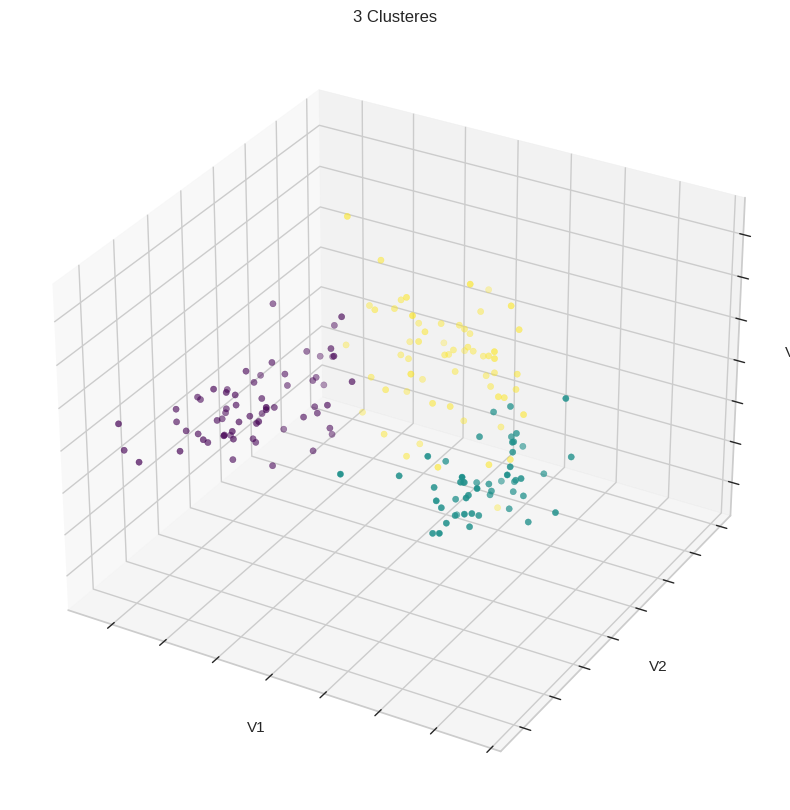

In [13]:
kmeans = KMeans(n_clusters=3, n_init=10)

fig = plt.figure(figsize=(10,10))
plt.get_cmap('tab10')
ax = fig.add_subplot(111, projection='3d')
kmeans.fit(dataset)
labels = kmeans.labels_
ax.scatter(dataset[0], dataset[1], dataset[2],c=labels, cmap="viridis")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("V1")
ax.set_ylabel("V2")
ax.set_zlabel("V3")
ax.set_title("3 Clusteres")

plt.show()

Sendo o mais semelhante com o gráfico dos clusters do dataset

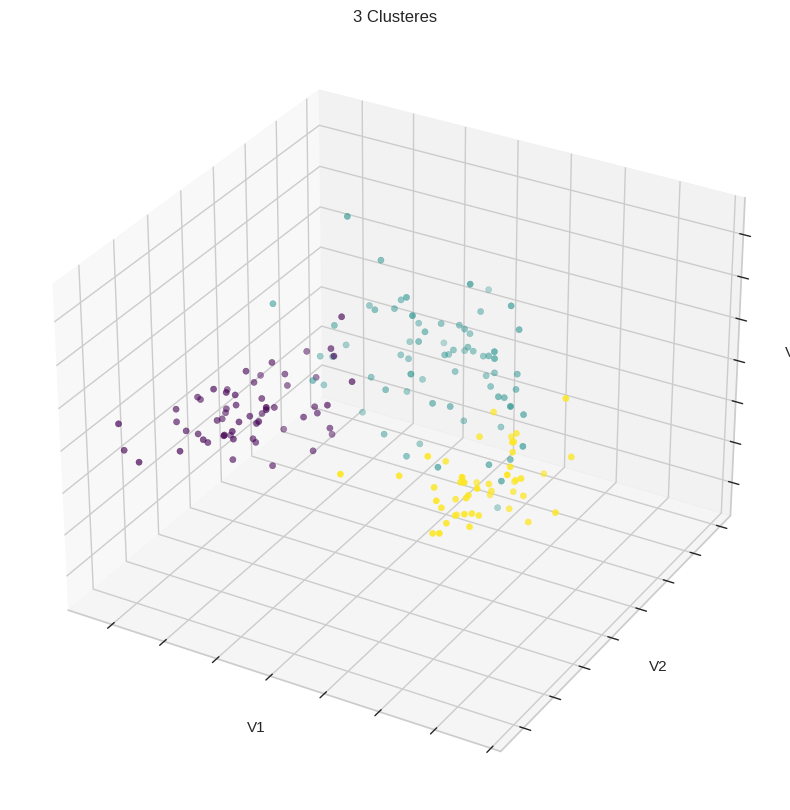

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)
target = df[0]

fig = plt.figure(figsize=(10,10))
plt.get_cmap('tab10')
ax = fig.add_subplot(111, projection='3d')
kmeans.fit(dataset)
ax.scatter(dataset[0], dataset[1], dataset[2],c=target, cmap="viridis")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("V1")
ax.set_ylabel("V2")
ax.set_zlabel("V3")
ax.set_title("3 Clusteres")

plt.show()

Enquanto que o gráfico do kmeans para as outras quantidades de clusteres tem mais diferenças

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


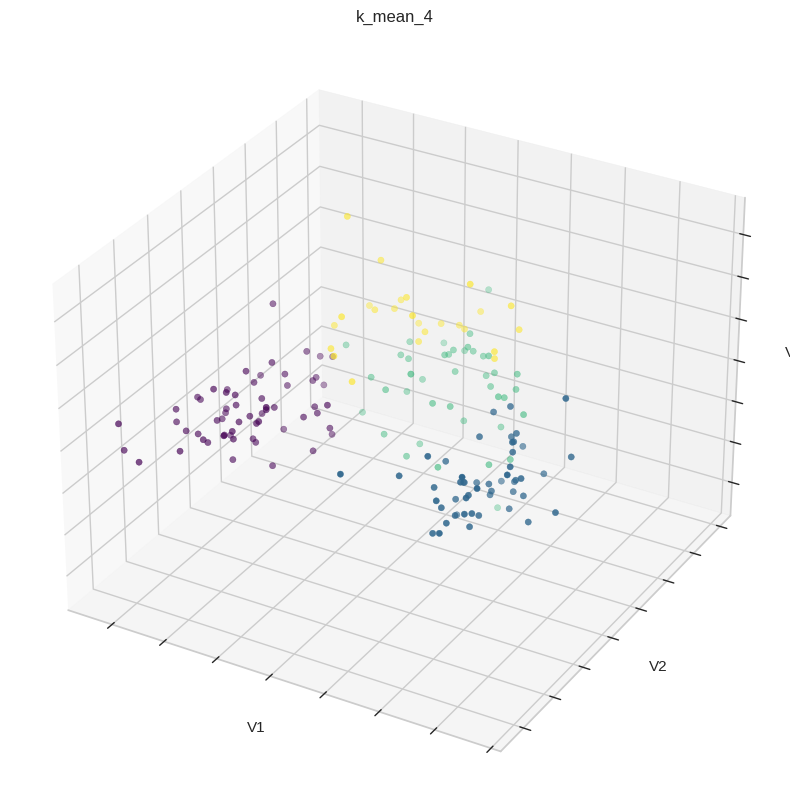

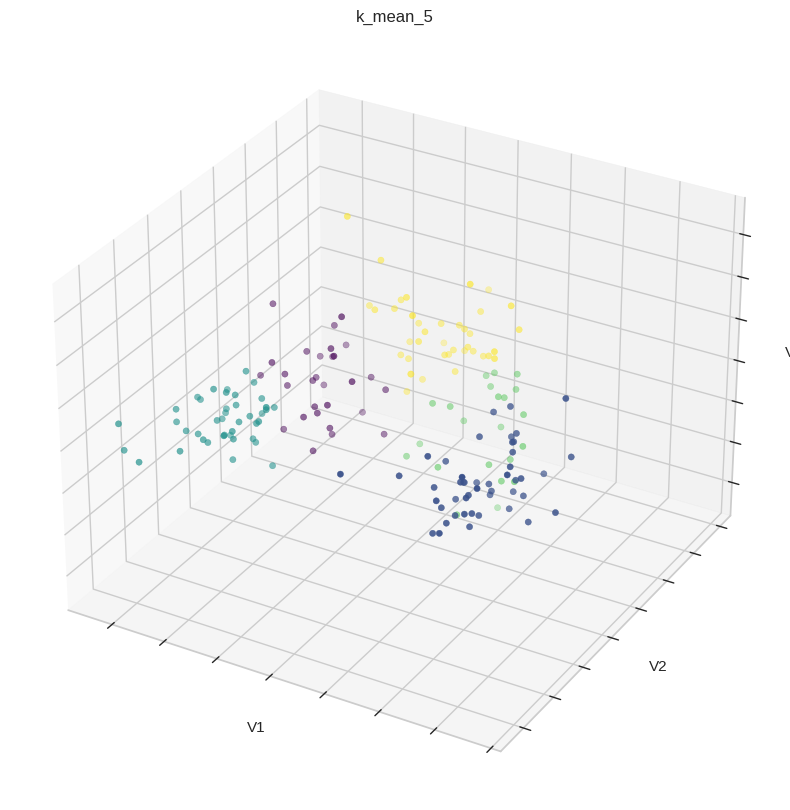

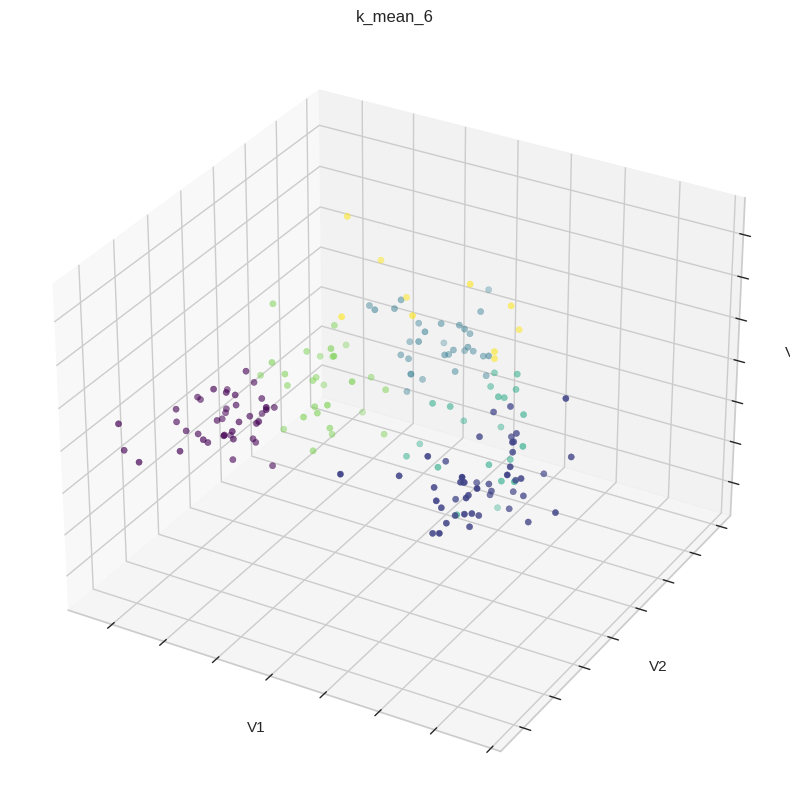

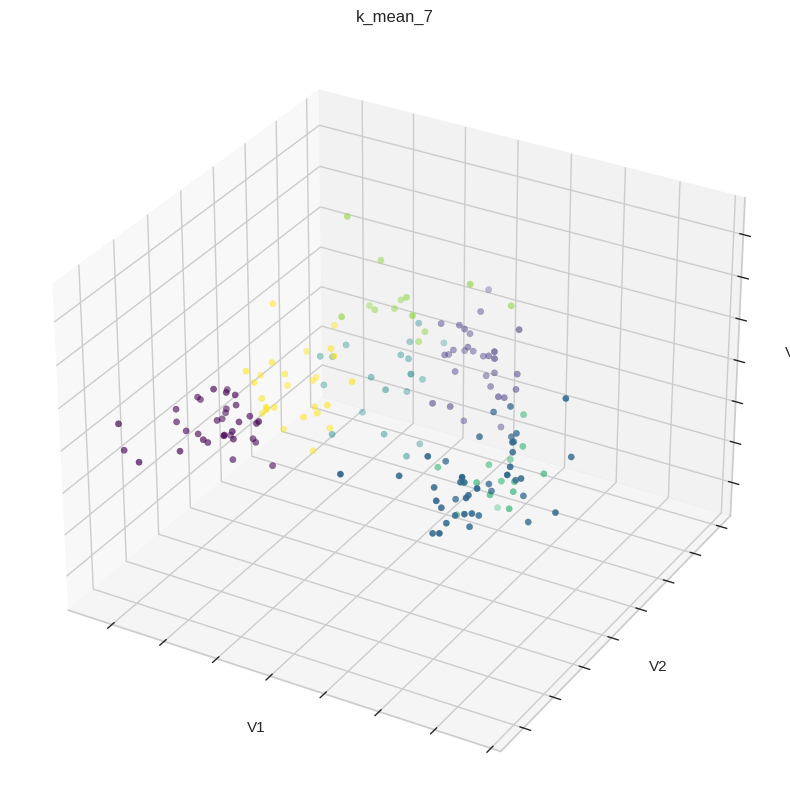

In [15]:
estimators = [
    ("k_mean_4", KMeans(n_clusters=4)),
    ("k_mean_5", KMeans(n_clusters=5)),
    ("k_mean_6", KMeans(n_clusters=6)),
    ("k_mean_7", KMeans(n_clusters=7)),
]

fignum = 1
titles = ["4 clusters", "5 clusters", "6 clusters", "7 clusters"]

for name, est in estimators:
    fig = plt.figure(figsize=(10,10))
    plt.get_cmap('tab10')
    ax = fig.add_subplot(111, projection='3d')
    est.fit(dataset)
    labels = est.labels_
    ax.scatter(dataset[0], dataset[1], dataset[2],c=labels, cmap="viridis")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("V1")
    ax.set_ylabel("V2")
    ax.set_zlabel("V3")
    ax.set_title(name)

    fignum = fignum + 1

plt.show()